# Example of environment simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gxr.envir import EnvirGame

/home/guestxr/envir/gxr/envir/dynamics.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Agents choosing random individual harvesting efforts

According to the theoretical analysis of the model we know that the
optimal sustainable harvesting occurs when the environment state
is at the half of the carrying capacity, $E(t) = K/2$,
and the agents/players harvest at the rate equal to the half
of the natural growth rate, $h = r/2$.

Thus, to simulate simple dynamics in which agents can harvest both below
and above this threshold we will sample individual harvesting rate from
the uniform distribution in the range $[0, r/N]$, so the overall harvesting
rate is always in $[0, r]$ with the expectation of $r/2$.

In [2]:
np.random.seed(303)   # choose different seed to get different results

# Configuration for the game
# can be also read from JSON-file with an analogous structure
# using the `.from_json` constructor method
config = {
    "n_agents": 4,            # number of players
    "E0": .25,
    "envir": {
        "K": 100,
        "T": 20
    },
    "profits": {
        "sustenance": .8,   # sustenance proportionality factor
        "cost": .2,         # harvesting cost proportionality factor
    }
}
# Initialize a game object from config dictionary
def sample_H(game):
    return np.random.uniform(0, game.envir.r/game.n_agents, game.n_agents)

T, dt = np.linspace(0, 100, 1000, retstep=True)
game  = EnvirGame.from_params(**config, dt=dt)
E     = [game.E]                          # environment states
U     = [game.U]                          # players' cumulative utilities
H     = [np.zeros(game.n_agents)]         # individual harvesting rates

for _ in T[1:]:
    h = sample_H(game)
    game.step(h)
    E.append(game.E)
    U.append(game.U)
    H.append(h)

E = np.array(E)
U = np.vstack(U)
H = np.vstack(H)


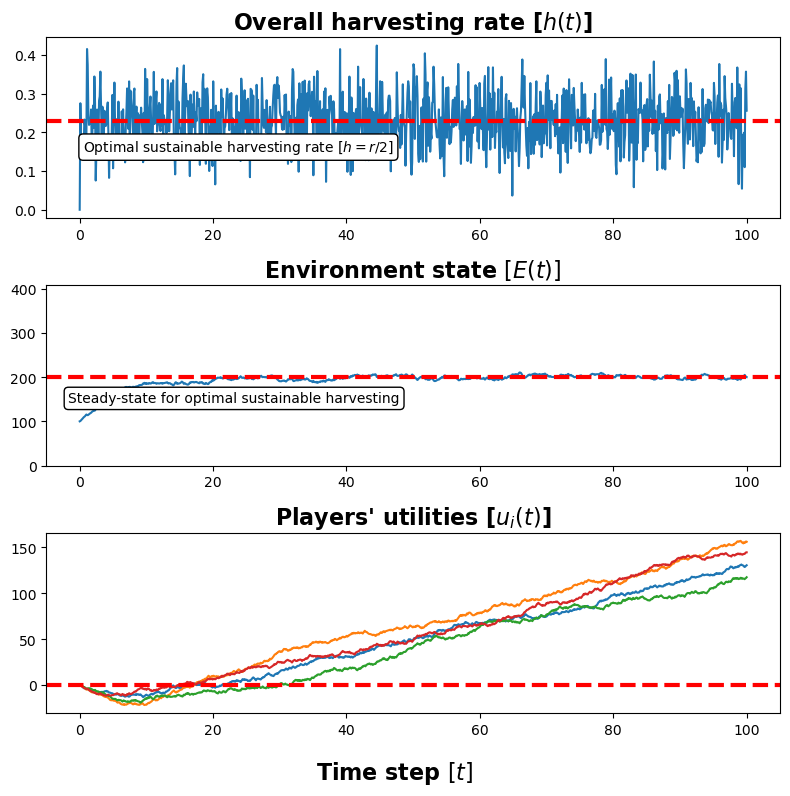

In [3]:
fig, axes = plt.subplots(nrows=3, figsize=(8, 8))

labs  = {"fontsize": 16, "fontweight": "bold"}
bkws  = {"boxstyle": "round", "fc": "white"}

ax = axes[0]
ax.plot(T, H.sum(axis=1))
ax.axhline(game.envir.r/2, ls="--", lw=3, color="red")
ax.set_title(r"Overall harvesting rate [$h(t)$]", **labs)
ax.annotate(
    r"Optimal sustainable harvesting rate $[h = r/2]$",
    (.05, .37), xycoords="axes fraction",
    bbox=bkws
)

ax = axes[1]
ax.plot(T, E)
ax.set_title(r"Environment state $[E(t)]$", **labs)
ax.set_ylim(0, game.envir.K*1.02)
ax.axhline(game.envir.K/2, ls="--", lw=3, color="red")
ax.annotate(
    r"Steady-state for optimal sustainable harvesting",
    (.03, .35), xycoords="axes fraction",
    bbox=bkws
)

ax = axes[2]
for u in U.T:
    ax.plot(T, u)
ax.set_title(r"Players' utilities [$u_i(t)$]", **labs)
ax.axhline(0, ls="--", lw=3, color="red")

fig.supxlabel(r"Time step $[t]$", **labs)
fig.tight_layout()
